### Principle Component Analysis (PCA) - Iris Dataset

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load Iris Dataset

In [3]:
from sklearn.datasets import load_iris

In [4]:
df = load_iris()

In [5]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
X = pd.DataFrame(df["data"],columns=df["feature_names"])

In [7]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y = df["target"]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Data Scaling
Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### PCA

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2)

In [14]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [15]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.72229951, 0.2397406 ])

Together, the first two principal components contain 95.80% of the information. The first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. The third and fourth principal component contained the rest of the variance of the dataset. 

### Model Building

In [16]:
from sklearn.svm import SVC

In [17]:
svc_model = SVC()

In [18]:
svc_model.fit(X_train,y_train)

SVC()

### Model Prediction and Evaluation

In [19]:
predictions = svc_model.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(confusion_matrix(y_test,predictions))

[[11  0  0]
 [ 0 10  3]
 [ 0  0  6]]


In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.77      0.87        13
           2       0.67      1.00      0.80         6

    accuracy                           0.90        30
   macro avg       0.89      0.92      0.89        30
weighted avg       0.93      0.90      0.90        30



<AxesSubplot:>

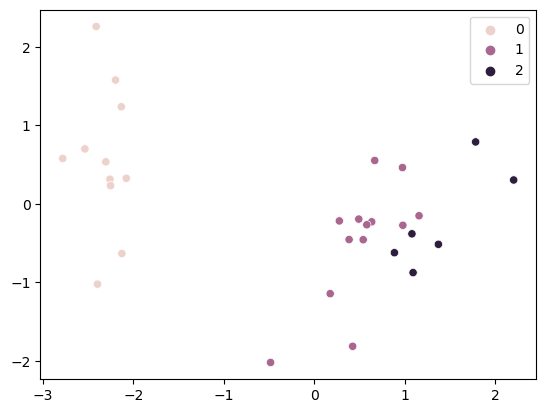

In [23]:
sns.scatterplot(x = X_test[:,0], y =X_test[:,1],hue=y_test)